In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# 1. Leer el archivo CSV sin cabecera
df = pd.read_csv('BACI_HS92_Y2023_V202501.csv', sep=',', header=0)

Contenido de BACI_HS92_Y2023_V202501.csv:

Productos en nomenclatura de 6 dígitos del Sistema Armonizado.
Flujos comerciales a nivel de año - exportador - importador - producto.

t, 1ª columna, año

i, 2ª columna, país exportador

j, 3ª columna, país importador

k, 4ª columna, producto

v, 5ª columna, volumen de producto intercambiado (toneladas métricas)

q, 6ª columna, valor monetario de la transacción (Cientos de dólares)

In [64]:
# 2. Agrupar los productos, k, para quedarse con los primeros 4 dígitos.
df['k'] = df['k'].apply(lambda x: str(x)[:4])  # Convertir 'k' a string antes de aplicar el slicing

In [65]:
# 4. Crear la matriz usando pivot_table para manejar entradas duplicadas
M = df.pivot_table(index='i', columns='k', values='q', aggfunc='sum')

# Reemplazar NaN por 0 en la matriz resultante
M = M.fillna(0)

# Convertir la matriz M a un DataFrame de pandas para facilitar su manipulación
M = pd.DataFrame(M, index=M.index, columns=M.columns)


Balassa‐type “Revealed Comparative Advantage” (RCA) index

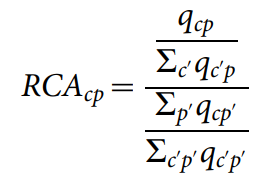

q_cp: quantity (e.g. exports) of product k by country i.

Divided by total quantity of product k across all countries.

Divided by total quantity of all products by country i.

Dividded by total quantity of all products across all countries.

El criterio del filtro no es cantidad exportada, sino valor de la cantidad exportada. Si un país regala productos, no afecta en su "economía".

In [66]:
# 7. Cálculos para RCA.
# Calcula el RCA_cp para cada elemento de la matriz q y lo sustituye en M.
filas, columnas = M.shape
M_rca = np.zeros((filas-1, columnas-1), dtype=float)  # Inicializa la matriz RCA_cp con ceros

In [67]:
suma_total = M.to_numpy().sum()  # Convertir M a un array NumPy para sumar

for c in range(filas-1):
    for p in range(columnas-1):
        suma_columna = M.iloc[:, p].sum()
        suma_fila = M.iloc[c, :].sum()
        if suma_columna == 0 or suma_fila == 0:
            M_rca[c, p] = 0  # Evitar división por cero
        else:
            M_rca[c, p] = (M.iloc[c, p] / suma_columna) * (suma_total / suma_fila)

In [68]:
# 8. Actualización y filtro.
for c in range(filas-1):
    for p in range(columnas-1):
        M.iloc[c, p] = np.where(M_rca[c, p] >= 1, 1, 0)

In [69]:
# Reordenar M
# Convertir M a un DataFrame si es un array de NumPy
if isinstance(M, np.ndarray):
	M = pd.DataFrame(M)

# Ordenar las filas y columnas de M según la suma de sus valores
M = M.loc[M.sum(axis=1).sort_values(ascending=False).index, M.sum(axis=0).sort_values(ascending=False).index]

In [70]:
# Imprimir el cabecero de M
print("\nCabecero de M:")
if isinstance(M, np.ndarray):
    M = pd.DataFrame(M)  # Convertir M a un DataFrame si es un array de NumPy
print(M.head())  # Imprime las primeras 5 filas de M


Cabecero de M:
k           2523        7402        2503        2807        2522        7403  \
i                                                                              
894  1332042.385  805520.328  568492.944  536837.205  409756.346  346569.636   
156        0.000       0.000       0.000       0.000       0.000       0.000   
251        0.000       0.000       0.000       0.000       1.000       0.000   
826        0.000       0.000       0.000       0.000       1.000       0.000   
56         0.000       0.000       0.000       1.000       1.000       1.000   

k          2202        2304        1701        2701  ...  4501  2913  4007  \
i                                                    ...                     
894  302677.741  207706.773  166242.368  156791.893  ...   0.0   0.0   0.0   
156       0.000       0.000       0.000       0.000  ...   0.0   1.0   0.0   
251       1.000       0.000       1.000       0.000  ...   0.0   0.0   0.0   
826       1.000       0.000      

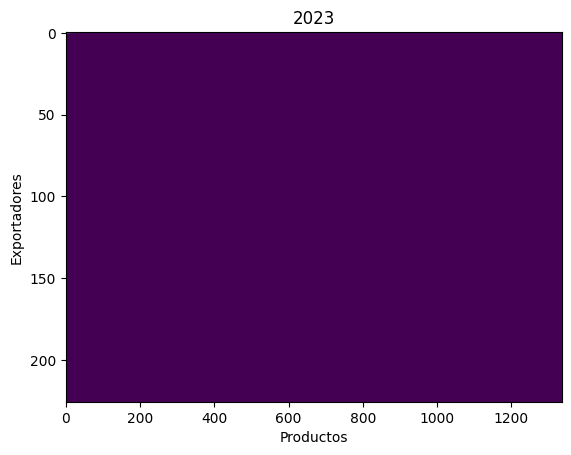

In [71]:
# 9. Representar la matriz M
plt.imshow(M, aspect='auto', cmap='viridis')  # Añadido para mostrar la matriz
plt.title("2023")
plt.xlabel("Productos")
plt.ylabel("Exportadores")
plt.show()

In [72]:
# 7. Exportar el resultado transpuesto a un archivo CSV
M.to_csv('M.csv', header=False, index=False)